In [48]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure 
%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (12, 8)

In [49]:
df = pd.read_csv("houseprice.csv", skipinitialspace = True)
df.head()

,Price,Sqr Ft,Longitude,Latitude,Lot Size,Beds,Bath,Year Built,Price Sqr Ft,Last Sold Year,Last Sold For,Address,City,State,Zipcode,Address Full
0,"$895,900","3,447 sqft",-112.081985,33.560055,"7,895 sqft",4.0,4.5,2019.0,$260/sqft,NaN,NaN,"630 W Echo Ln Phoenix, AZ 85021",Phoenix,AZ,85021.0,"630 W Echo Ln, Phoenix, AZ 85021"
1,"$247,000","1,767 sqft",-96.676250,32.829227,"7,877 sqft",3.0,2.0,1954.0,$140/sqft,NaN,NaN,"2367 Highwood Dr Dallas, TX 75228",Dallas,TX,75228.0,"2367 Highwood Dr, Dallas, TX 75228"
2,"$44,900","1,232 sqft",-78.825190,42.913000,"3,510 sqft",3.0,1.0,1900.0,$36/sqft,NaN,NaN,"30 Hurlock Ave Buffalo, NY 14211",Buffalo,NY,14211.0,"30 Hurlock Ave, Buffalo, NY 14211"
3,"$959,000","1,417 sqft",-73.860170,40.722960,"2,598 sqft",3.0,2.0,1939.0,$677/sqft,2009.0,"$532,000","6416 Alderton St Flushing, NY 11374",Flushing,NY,11374.0,"6416 Alderton St, Flushing, NY 11374"
4,"$83,500",440 sqft,-80.206314,25.937965,NaN,NaN,1.0,1971.0,$190/sqft,2007.0,"$52,000","251 NW 177th St #A-123 Miami Gardens, FL 33169",Miami Gardens,FL,33169.0,"251 NW 177th St #A-123, Miami Gardens, FL 33169"


We are getting an overview of our dataset

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30006 entries, 0 to 30005
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Price           30006 non-null  object 
 1   Sqr Ft          27786 non-null  object 
 2   Longitude       30006 non-null  float64
 3   Latitude        30006 non-null  float64
 4   Lot Size        25490 non-null  object 
 5   Beds            27420 non-null  float64
 6   Bath            27496 non-null  float64
 7   Year Built      26258 non-null  float64
 8   Price Sqr Ft    27271 non-null  object 
 9   Last Sold Year  14213 non-null  float64
 10  Last Sold For   14213 non-null  object 
 11  Address         30006 non-null  object 
 12  City            30006 non-null  object 
 13  State           30006 non-null  object 
 14  Zipcode         30003 non-null  float64
 15  Address Full    30006 non-null  object 
dtypes: float64(7), object(9)
memory usage: 3.7+ MB


# Data Cleaning


In our dataset Price column has is an object which we have to convert into number. So we are taking off the '$' sign. There is also some non numeric values like '+' and some strings like 'Contact for Estimate'. We need to take that away.

In [51]:

import re


# Convert the "Price" column to string data type
df['Price'] = df['Price'].astype(str)

df['Price'] = df['Price'].str.replace('[\$,]', '', regex=True)

# Use the .str accessor to clean the column
df['Price'] = df['Price'].str.replace('[^\d.]', '', regex=True)

# Replace empty strings and very large values with NaN
df['Price'] = df['Price'].replace(['', 'very_large_value_here'], np.nan)

# Convert the column to a numeric data type
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Replace specific problematic values with NaN
df['Price'] = df['Price'].replace(['problematic_value'], np.nan)

df['Price'] = pd.to_numeric(df['Price'], errors='coerce')


Then we see that there are some numbers which is too long for float. We also take these away.

In [52]:
from decimal import Decimal

# Assuming you have a DataFrame 'df' with a 'Price' column
df['Price'] = df['Price'].apply(lambda x: Decimal(x) if x else None)

# Define the threshold for large numbers
threshold = 1000000

# Filter the DataFrame to exclude rows with "Price" values exceeding the threshold
df = df[df['Price'] <= threshold]

In [53]:
X = df[['Price']].values

# K means Clustering


In [54]:
from sklearn.cluster import KMeans

k = 4 # We are randomly taking k
kmeans = KMeans(n_clusters = k)
df['Price Cluster'] = kmeans.fit_predict(X)

In [56]:
df['Price'].info()

<class 'pandas.core.series.Series'>
Int64Index: 27052 entries, 0 to 30004
Series name: Price
Non-Null Count  Dtype 
--------------  ----- 
27052 non-null  object
dtypes: object(1)
memory usage: 422.7+ KB


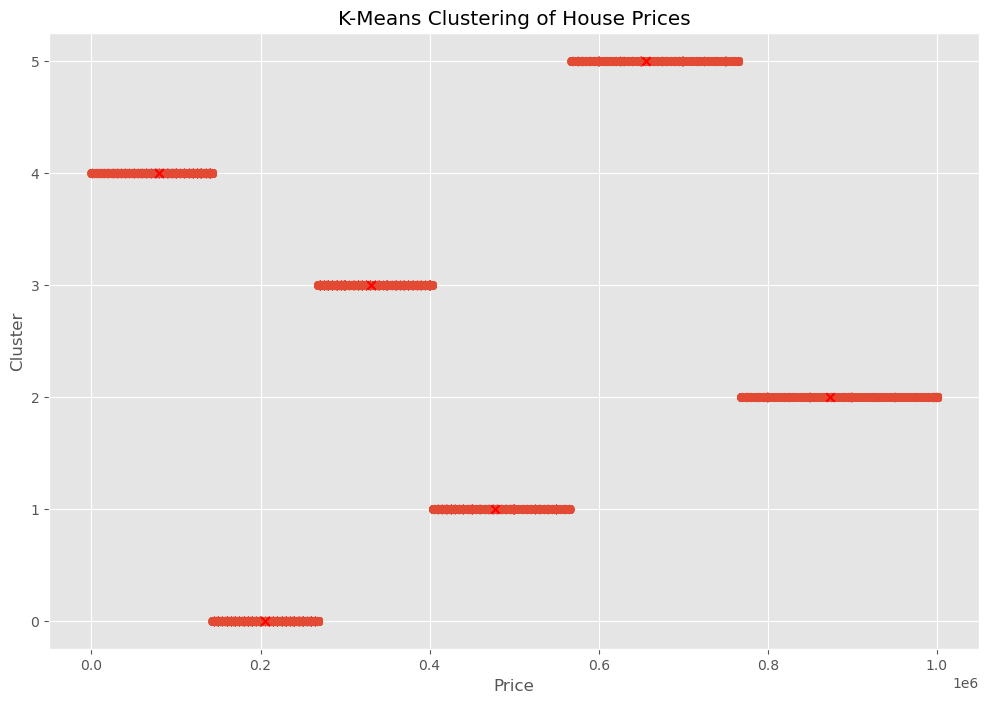

In [72]:
plt.scatter(X, kmeans.labels_)
plt.scatter(kmeans.cluster_centers_, np.arange(k), c='red', marker='x')
plt.xlabel('Price')
plt.ylabel('Cluster')
plt.title('K-Means Clustering of House Prices')
plt.show()

# Elbow Method

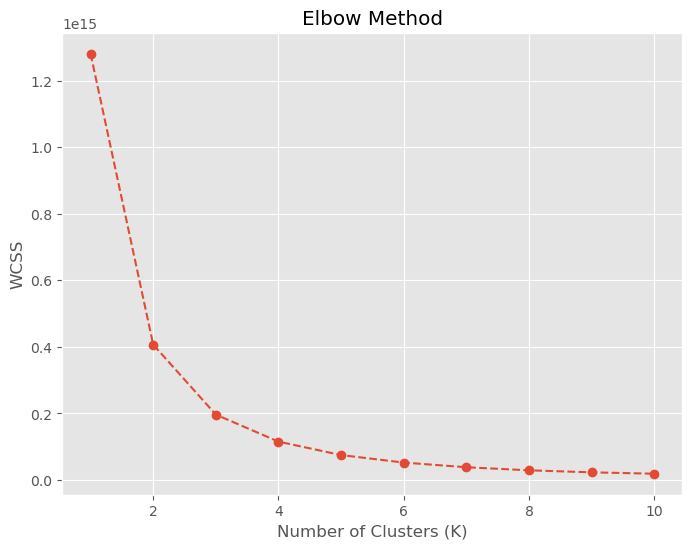

In [58]:
# We are using the Elbow Method to find the optimal number of clusters
wcss = []  # Within-Cluster-Sum-of-Squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.show()


From the Elbow method we can find that the optimum number of cluster is 4.

In [79]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)


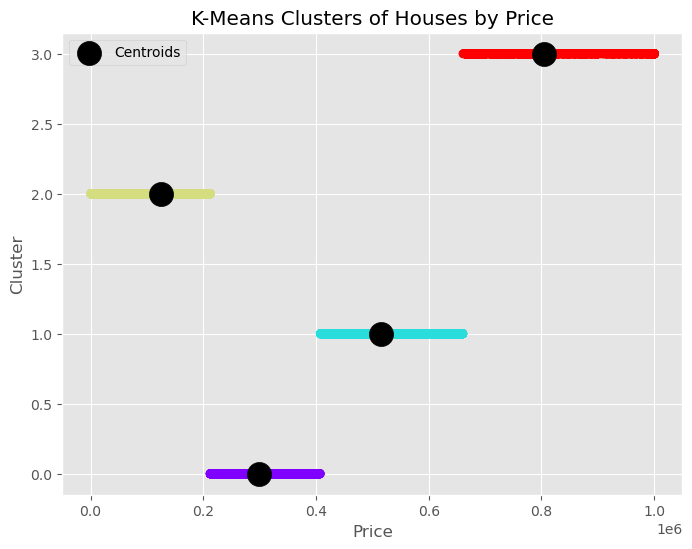

In [80]:
plt.figure(figsize=(8, 6))
plt.scatter(X, y_kmeans, c=y_kmeans, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], np.arange(0, 4), s=300, c='black', label='Centroids')
plt.title('K-Means Clusters of Houses by Price')
plt.xlabel('Price')
plt.ylabel('Cluster')
plt.legend()
plt.show()


# Visualizing clustering result 

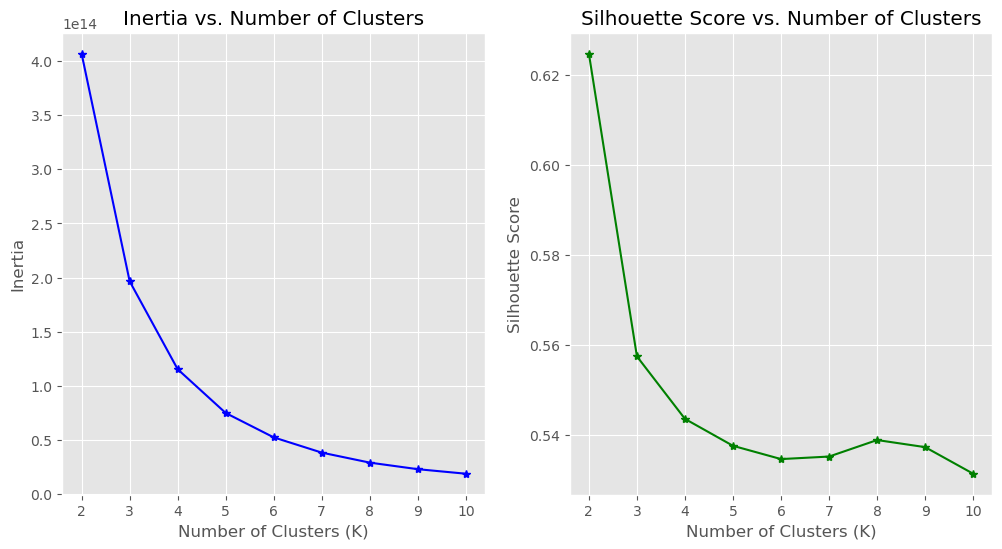

In [81]:
from sklearn.metrics import silhouette_score



# Define a range of K values to test
k_values = range(2, 11)  # Try different values of K

# Initialize lists to store metrics
inertia_values = []
silhouette_values = []

# Loop over different values of K
for k in k_values:
    # Create and fit the K-Means model
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    
    # Append the inertia and silhouette scores to the lists
    inertia_values.append(kmeans.inertia_)
    silhouette_values.append(silhouette_score(X, kmeans.labels_))

# Plot the Inertia values to find the elbow point
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia_values, 'b*-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Inertia vs. Number of Clusters')

# Plot the Silhouette scores to find the best K
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_values, 'g*-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()


We choosed Agglomerative Clustering and compared it with the K Means clustering and visualize the result.

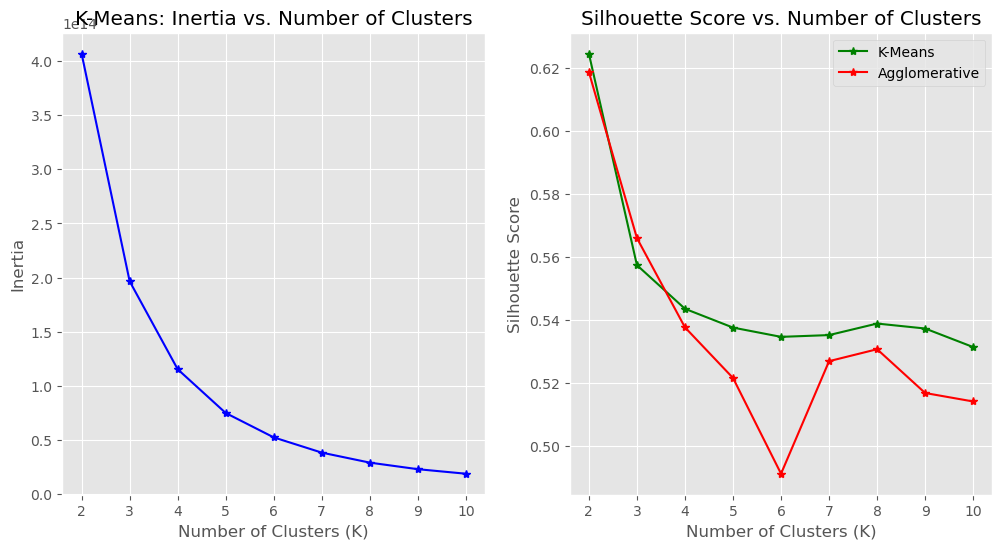

In [82]:
from sklearn.cluster import AgglomerativeClustering


# Define a range of K values to test for K-Means
k_values = range(2, 11)  # Try different values of K

# Initialize lists to store metrics for K-Means
inertia_values = []
silhouette_values_kmeans = []

# Initialize lists to store metrics for Agglomerative Hierarchical Clustering
silhouette_values_agglo = []

# Loop over different values of K
for k in k_values:
    # Create and fit the K-Means model
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    
    # Append the inertia and silhouette scores for K-Means
    inertia_values.append(kmeans.inertia_)
    silhouette_values_kmeans.append(silhouette_score(X, kmeans.labels_))
    
    # Create and fit the Agglomerative Hierarchical Clustering model
    agglomerative = AgglomerativeClustering(n_clusters=k)
    agglomerative.fit(X)
    
    # Append the silhouette score for Agglomerative Hierarchical Clustering
    silhouette_values_agglo.append(silhouette_score(X, agglomerative.labels_))

# Plot the Inertia values for K-Means to find the elbow point
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia_values, 'b*-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('K-Means: Inertia vs. Number of Clusters')

# Plot the Silhouette scores for both K-Means and Agglomerative
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_values_kmeans, 'g*-', label='K-Means')
plt.plot(k_values, silhouette_values_agglo, 'r*-', label='Agglomerative')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.legend()
plt.show()


Using Agglomerative Clustering we found that optimal number of cluster should be 6. So we are using 6 clusters and visualize our result.

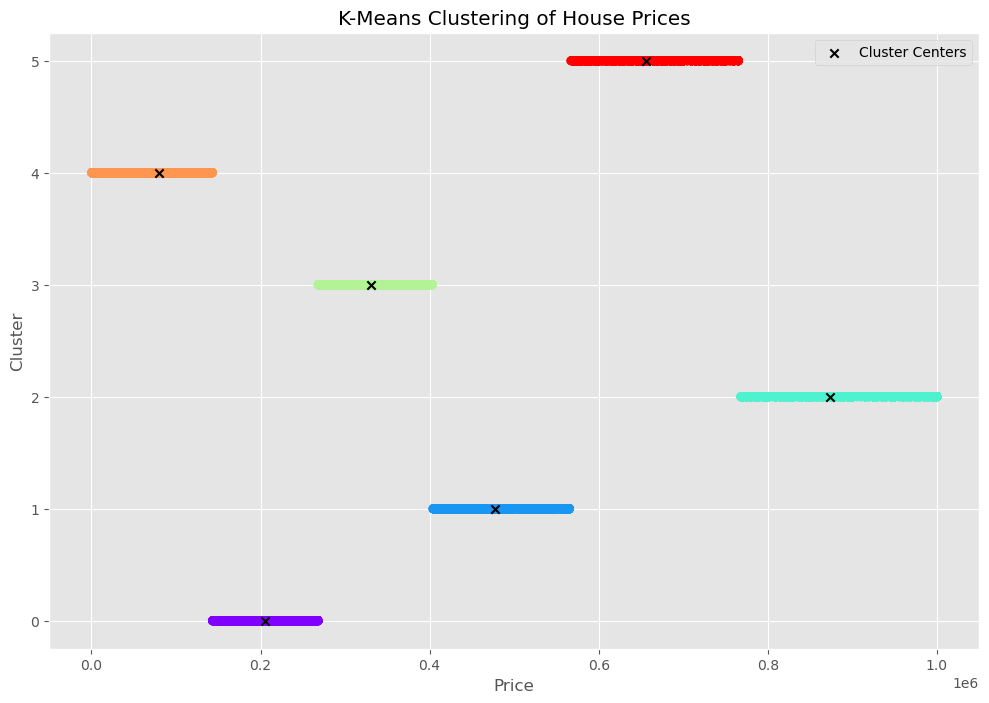

In [83]:

k = 6  # From Agglomerative Clustering

# Create a K-Means model
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit the model to your data
kmeans.fit(X)

# Add the cluster labels to your DataFrame
df['Price Cluster'] = kmeans.labels_

# Create a scatter plot to visualize the clustering
plt.scatter(X, kmeans.labels_, c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_, np.arange(k), c='black', marker='x', label='Cluster Centers')
plt.xlabel('Price')
plt.ylabel('Cluster')
plt.title('K-Means Clustering of House Prices')
plt.legend()
plt.show()
